- How much data would we need to download when covering Brandenburg in its entirety?

In [21]:
from datetime import date
import os
from sentinel_helpers import search_osm
from sentinelsat import SentinelAPI

api = SentinelAPI(os.getenv('SCIHUB_USERNAME'), os.getenv('SCIHUB_PASSWORD'))
start_date = date(2018, 1, 1)
end_date = date(2018, 12, 31)
cloud_coverage = (0, 30)

<AxesSubplot:>

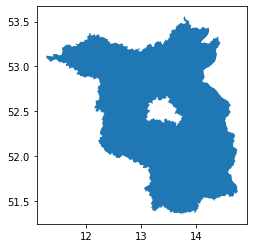

In [13]:
brandenburg = search_osm('Brandenburg, Germany')
brandenburg = brandenburg[brandenburg['type'] == 'administrative'][:1]
brandenburg.plot()

In [33]:
footprint = brandenburg.iloc[0]['geometry'].convex_hull.wkt
results = api.query(footprint,
                    platformname='Sentinel-2',
                    processinglevel='Level-2A',
                    date=(start_date, end_date),
                    cloudcoverpercentage=cloud_coverage)

Querying products: 100%|██████████| 638/638 [00:38<00:00, 14.05 products/s]


- Size in Gigabyte of a whole year

In [34]:
def human_readable_size_to_bytes(size):
    return float(size.split(' ')[0]) * 1024 * 1024 * (1024 if 'GB' in size else 1)

In [35]:
gdf = SentinelAPI.to_geodataframe(results)

size_in_bytes = gdf['size'].apply(human_readable_size_to_bytes)
size_in_bytes.sum() / 1024 ** 3

517.64189453125

- the official forest fire season is from march 1 until october 31
  - see https://mluk.brandenburg.de/mluk/de/landwirtschaft/forst/waldschutz/waldbrandgefahr-in-brandenburg/

In [29]:
season_start = date(2018, 3, 1)
season_end = date(2018, 10, 31)
results = api.query(footprint,
                    platformname='Sentinel-2',
                    processinglevel='Level-2A',
                    date=(season_start, season_end),
                    cloudcoverpercentage=cloud_coverage)

Querying products: 100%|██████████| 579/579 [00:30<00:00, 15.51 products/s]


In [32]:
gdf = SentinelAPI.to_geodataframe(results)

size_in_bytes = gdf['size'].apply(human_readable_size_to_bytes)
size_in_bytes.sum() / 1024 ** 3

468.66688476562496

In [27]:
! df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         247G  185G   49G  80% /
tmpfs            64M     0   64M   0% /dev
tmpfs            16G     0   16G   0% /sys/fs/cgroup
shm              64M   60K   64M   1% /dev/shm
/dev/xvda1      247G  185G   49G  80% /home/jovyan
tmpfs            16G     0   16G   0% /sys/firmware


- We use https://forst.brandenburg.de/sixcms/media.php/9/wbra2018.pdf as an indicator for which area's we are interested in